In [ ]:
import os
import numpy as np
from matplotlib import pyplot

In [ ]:
# Leer datos
data = np.loadtxt('/content/drive/MyDrive/Colab/laboratorio01.txt', delimiter=',')
X, y = data[:, :7], data[:,2]
m = y.size

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X.shape

(36631, 7)

In [ ]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = normalizarCaracteristicas(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[ 2.  5.  7. ... 13. 16. 18.]
 [ 2.  6.  8. ... 15. 16. 18.]
 [ 2.  5.  7. ... 13. 16. 19.]
 ...
 [ 2.  5.  7. ... 13. 16. 18.]
 [ 2.  6.  7. ... 13. 16. 20.]
 [ 2.  4.  8. ... 14. 17. 18.]]
Media calculada: [ 2.14725233  5.1291802   7.75223172 11.62316071 13.93273457 16.33206847
 18.1939341 ]
Desviación estandar calculada: [0.5331346  0.87104608 0.77949155 0.69743933 0.85856989 0.47095541
 0.5046883 ]
[[-0.27620103 -0.14830467 -0.96502869 ... -1.08638164 -0.70509534
  -0.3842651 ]
 [-0.27620103  0.99974021  0.31785884 ...  1.24307345 -0.70509534
  -0.3842651 ]
 [-0.27620103 -0.14830467 -0.96502869 ... -1.08638164 -0.70509534
   1.59715592]
 ...
 [-0.27620103 -0.14830467 -0.96502869 ... -1.08638164 -0.70509534
  -0.3842651 ]
 [-0.27620103  0.99974021 -0.96502869 ... -1.08638164 -0.70509534
   3.57857694]
 [-0.27620103 -1.29634955  0.31785884 ...  0.0783459   1.41824792
  -0.3842651 ]]


In [ ]:
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

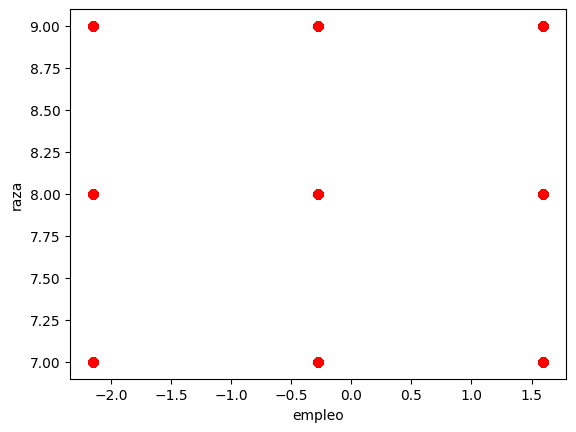

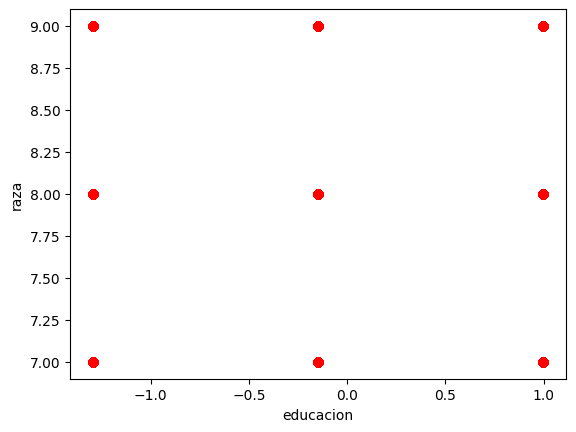

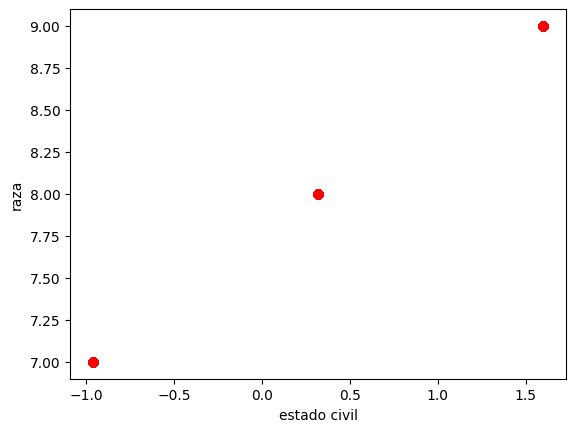

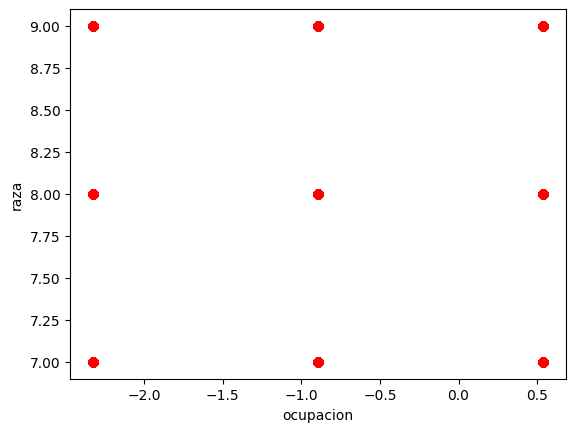

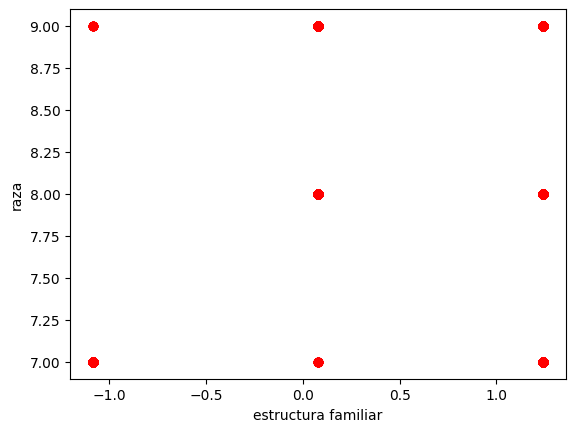

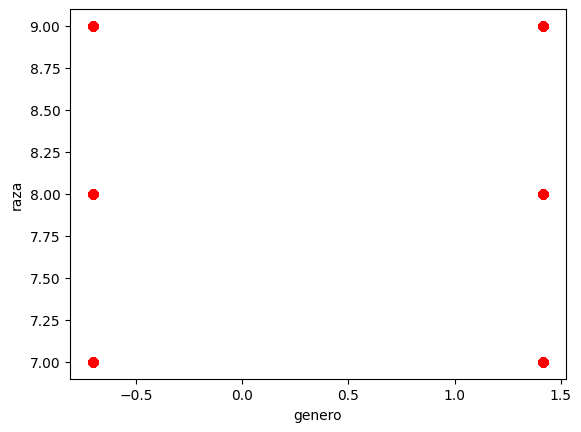

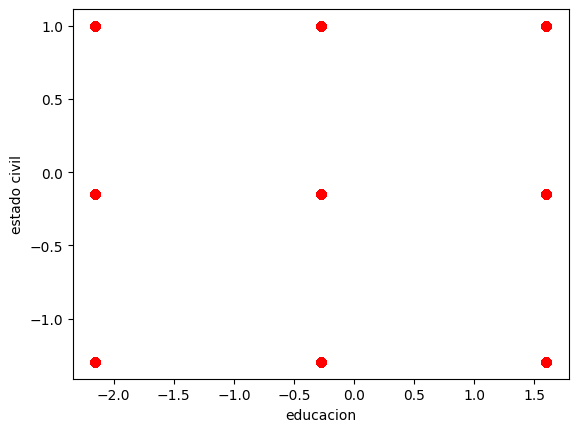

In [ ]:
xlabel0 = "empleo"
xlabel1 = "educacion"
xlabel2 = "estado civil"
xlabel3 = "ocupacion"
xlabel4 = "estructura familiar"
xlabel5 = "genero"
ylabel1 = "raza"
graficarDatos(X_norm[:, 0], y, xlabel0, ylabel1)
graficarDatos(X_norm[:, 1], y, xlabel1, ylabel1)
graficarDatos(X_norm[:, 2], y, xlabel2, ylabel1)
graficarDatos(X_norm[:, 3], y, xlabel3, ylabel1)
graficarDatos(X_norm[:, 4], y, xlabel4, ylabel1)
graficarDatos(X_norm[:, 5], y, xlabel5, ylabel1)
graficarDatos(X_norm[:, 0], X_norm[:, 1], xlabel1, xlabel2)


In [ ]:
# No olvidarse agregar unos a la matriz de x
#munos = np.ones([m, 1]).unsqueese
#print(munos.shape)
#X = np.stack([np.ones(m), X], axis=1)
#X = np.stack([X, munos], axis=1)
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.insert(X, 0, 1, axis=1)
# X.shape

In [ ]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [ ]:
theta=np.array([0.1, 5.0, 0.1])
JJ = calcularCosto(X_ready, y, theta)
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")

con theta:[0.1 5.  0.1] se obtiene un costo de: 65590979786.43182


In [ ]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

los valores de theta calculados son: [340397.21258957 108735.84407295  -5866.41971213]
con un costo de: 2043503206.6600745 


Text(0, 0.5, 'Costo J')

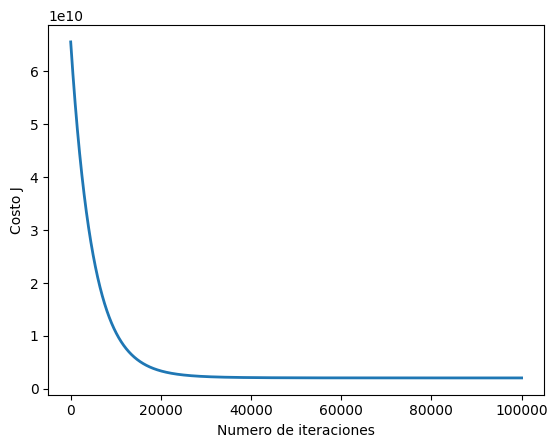

In [ ]:
theta = np.zeros(3)

num_ite = 100000
alpha = 0.0001

theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')


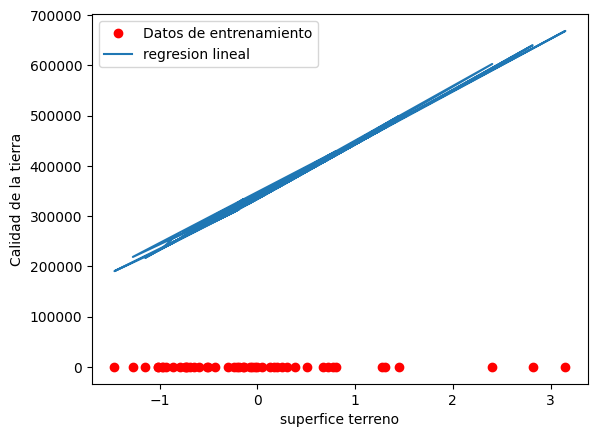

In [ ]:
#graficarDatos(X[:, 1], y, xlabel1, ylabel1)
# graficarDatos(X[:, 2], y, xlabel2, ylabel1)
graficarDatos(X_ready[:, 1], X_ready[:, 2], xlabel1, xlabel2)

pyplot.plot(X_ready[:, 1], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

In [ ]:
# 2300,4,449900
y_pred = np.dot([1, 2305, 4], theta)
print(y_pred)

250953052.1218971


In [ ]:
#Utilizando la ecuacion de la norma

In [ ]:
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [ ]:
X_ren = np.concatenate([np.ones((m, 1)), X], axis=1)

In [ ]:
theta = calcularThethaEcuacionNormal(X_ren, y);
print(f"los valores de theta calculados son: { theta }")


los valores de theta calculados son: [89597.9095428    139.21067402 -8738.01911233]


In [ ]:
X_array = [1, 2305, 4]
price = np.dot(X_array, theta)

print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): $375526
